In [1]:
## AE Mixed Loss Experiment Notebook
# 1. Connect to Drive
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/projects/ae-vae-anomaly-detection/data/processed/cleaned.csv'

Mounted at /content/drive


In [2]:
# 2. Load Processed Data
import pandas as pd

#load cleaned data
cleaned_df = pd.read_csv(data_path)
print(f'Loaded cleaned data: {cleaned_df.shape[0]} rows, {cleaned_df.shape[1]} columns')

# get a small sample for training model
df = cleaned_df.sample(frac=0.1, random_state=42)
print(f'Sampled data: {df.shape[0]} rows, {df.shape[1]} columns')

Loaded cleaned data: 640788 rows, 178 columns
Sampled data: 64079 rows, 178 columns


In [3]:
# 3. Train/Test Split
from sklearn.model_selection import train_test_split

# Separate features and label
X = df.drop(columns='label')
y = df['label']

# First split off a mixed test set (normal+anomaly), stratified to keep the same
#    anomaly ratio in train and test.
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# From the remaining (X_temp / y_temp) we only train on the normal samples:
#    i.e. drop the anomalies from this “train+val pool”
X_train_val = X_temp[y_temp == 0]

# Finally split that normal‐only pool into X_train / X_val
X_train, X_val = train_test_split(
    X_train_val,
    test_size=0.2,
    random_state=42
)

# Now:
#  - X_train, X_val are both *only* normal samples (for AE/VAE training & early stopping)
#  - X_test / y_test is your held‐out mixed set (with both normal and anomalous),
#    and it never overlaps with X_train or X_val

In [4]:
!mkdir -p /content/src/models

In [6]:
import sys
sys.path.append('/content/src')
from models.ae_model import build_ae, train_autoencoder_mixed_loss, train_autoencoder, plot_training_history
from models.ae_evaluation import evaluate_anomaly_detection, visualize_reconstruction, compute_reconstruction_error

In [ ]:
from src.models.ae_model import build_ae
from importlib import reload
import src.models.ae_model as ae_model
reload(ae_model)

<module 'src.models.ae_model' from '/content/src/models/ae_model.py'>

Epoch 1/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1347 - mae: 0.2467

627/627 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.1345 - mae: 0.2465 - val_loss: 0.0029 - val_mae: 0.0151 - learning_rate: 0.0010
Epoch 2/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0041 - mae: 0.0263

627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0041 - mae: 0.0262 - val_loss: 0.0024 - val_mae: 0.0107 - learning_rate: 0.0010
Epoch 3/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mae: 0.0135

627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0029 - mae: 0.0135 - val_loss: 0.0018 - val_mae: 0.0092 - learning_rate: 0.0010
Epoch 4/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mae: 0.0124

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0025 - mae: 0.0124 - val_loss: 0.0015 - val_mae: 0.0086 - learning_rate: 0.0010
Epoch 5/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 - mae: 0.0118

627/627 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0022 - mae: 0.0118 - val_loss: 0.0011 - val_mae: 0.0075 - learning_rate: 0.0010
Epoch 6/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - mae: 0.0114

627/627 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0020 - mae: 0.0114 - val_loss: 9.8903e-04 - val_mae: 0.0070 - learning_rate: 0.0010
Epoch 7/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mae: 0.0109

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0018 - mae: 0.0109 - val_loss: 9.2512e-04 - val_mae: 0.0066 - learning_rate: 0.0010
Epoch 8/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - mae: 0.0107

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0017 - mae: 0.0107 - val_loss: 8.5285e-04 - val_mae: 0.0062 - learning_rate: 0.0010
Epoch 9/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016 - mae: 0.0103

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0016 - mae: 0.0103 - val_loss: 8.3407e-04 - val_mae: 0.0066 - learning_rate: 0.0010
Epoch 10/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - mae: 0.0102

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0015 - mae: 0.0102 - val_loss: 7.6102e-04 - val_mae: 0.0061 - learning_rate: 0.0010
Epoch 11/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - mae: 0.0100

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0014 - mae: 0.0100 - val_loss: 7.2749e-04 - val_mae: 0.0059 - learning_rate: 0.0010
Epoch 12/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - mae: 0.0099

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0014 - mae: 0.0099 - val_loss: 6.9681e-04 - val_mae: 0.0057 - learning_rate: 0.0010
Epoch 13/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - mae: 0.0096

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0013 - mae: 0.0096 - val_loss: 6.4732e-04 - val_mae: 0.0054 - learning_rate: 0.0010
Epoch 14/100
617/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - mae: 0.0096

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0013 - mae: 0.0096 - val_loss: 5.9536e-04 - val_mae: 0.0053 - learning_rate: 0.0010
Epoch 15/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0094

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0012 - mae: 0.0094 - val_loss: 5.0811e-04 - val_mae: 0.0052 - learning_rate: 0.0010
Epoch 16/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0093

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0012 - mae: 0.0093 - val_loss: 4.7660e-04 - val_mae: 0.0050 - learning_rate: 0.0010
Epoch 17/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0093

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0012 - mae: 0.0093 - val_loss: 4.7246e-04 - val_mae: 0.0049 - learning_rate: 0.0010
Epoch 18/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0091

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0011 - mae: 0.0091 - val_loss: 4.7091e-04 - val_mae: 0.0052 - learning_rate: 0.0010
Epoch 19/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mae: 0.0091


Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0011 - mae: 0.0091 - val_loss: 4.4504e-04 - val_mae: 0.0047 - learning_rate: 0.0010
Epoch 20/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0088

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.3075e-04 - val_mae: 0.0044 - learning_rate: 5.0000e-04
Epoch 21/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0086

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0011 - mae: 0.0086 - val_loss: 4.2049e-04 - val_mae: 0.0043 - learning_rate: 5.0000e-04
Epoch 22/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mae: 0.0087


Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.1609e-04 - val_mae: 0.0042 - learning_rate: 5.0000e-04
Epoch 23/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0085

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 4.0718e-04 - val_mae: 0.0042 - learning_rate: 2.5000e-04
Epoch 24/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0085

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 4.0562e-04 - val_mae: 0.0042 - learning_rate: 2.5000e-04
Epoch 25/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - mae: 0.0085


Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 4.0013e-04 - val_mae: 0.0041 - learning_rate: 2.5000e-04
Epoch 26/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0085

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 3.9906e-04 - val_mae: 0.0040 - learning_rate: 1.2500e-04
Epoch 27/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0084

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.9609e-04 - val_mae: 0.0039 - learning_rate: 1.2500e-04
Epoch 28/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010 - mae: 0.0084


Epoch 28: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.9562e-04 - val_mae: 0.0040 - learning_rate: 1.2500e-04
Epoch 29/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.9629e-04 - val_mae: 0.0040 - learning_rate: 6.2500e-05
Epoch 30/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0010 - mae: 0.0083 - val_loss: 3.9711e-04 - val_mae: 0.0040 - learning_rate: 6.2500e-05
Epoch 31/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010 - mae: 0.0084


Epoch 31: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.9286e-04 - val_mae: 0.0039 - learning_rate: 6.2500e-05
Epoch 32/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.9482e-04 - val_mae: 0.0040 - learning_rate: 3.1250e-05
Epoch 33/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0084

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.9241e-04 - val_mae: 0.0039 - learning_rate: 3.1250e-05
Epoch 34/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010 - mae: 0.0083


Epoch 34: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0010 - mae: 0.0083 - val_loss: 3.9189e-04 - val_mae: 0.0039 - learning_rate: 3.1250e-05
Epoch 35/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.9259e-04 - val_mae: 0.0039 - learning_rate: 1.5625e-05
Epoch 36/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.9655e-04 - mae: 0.0083

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 9.9672e-04 - mae: 0.0083 - val_loss: 3.9105e-04 - val_mae: 0.0039 - learning_rate: 1.5625e-05
Epoch 37/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - mae: 0.0083


Epoch 37: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0010 - mae: 0.0083 - val_loss: 3.9055e-04 - val_mae: 0.0039 - learning_rate: 1.5625e-05
Epoch 38/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0010 - mae: 0.0083 - val_loss: 3.9129e-04 - val_mae: 0.0039 - learning_rate: 7.8125e-06
Epoch 39/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.9143e-04 - val_mae: 0.0039 - learning_rate: 7.8125e-06
Epoch 40/100
616/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010 - mae: 0.0083


Epoch 40: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0010 - mae: 0.0083 - val_loss: 3.9053e-04 - val_mae: 0.0039 - learning_rate: 7.8125e-06
Epoch 41/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 9.9473e-04 - mae: 0.0083 - val_loss: 3.9220e-04 - val_mae: 0.0039 - learning_rate: 3.9063e-06
Epoch 42/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0083

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0010 - mae: 0.0083 - val_loss: 3.9045e-04 - val_mae: 0.0039 - learning_rate: 3.9063e-06
Epoch 43/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010 - mae: 0.0083
Epoch 43: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0010 - mae: 0.0083 - val_loss: 3.9178e-04 - val_mae: 0.0039 - learning_rate: 3.9063e-06
Epoch 44/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0010 - mae: 0.0083 - val_loss: 3.9368e-04 - val_mae: 0.0039 - learning_rate: 1.9531e-06
Epoch 45/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.9143e-04 - val_mae: 0.0039 - learning_rate: 1.9531e-06
Epoch 46/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010 - mae: 0.0083
Epoch 46: ReduceLROnPlateau reducing learning rate to 1e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0010 - mae: 0.0083 - val_loss: 3.9061e-04 - val_mae: 0.0039 - 

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0010 - mae: 0.0083 - val_loss: 3.9035e-04 - val_mae: 0.0039 - learning_rate: 1.0000e-06
Epoch 48/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.9085e-04 - val_mae: 0.0039 - learning_rate: 1.0000e-06
Epoch 49/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010 - mae: 0.0084

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.8930e-04 - val_mae: 0.0038 - learning_rate: 1.0000e-06
Epoch 50/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0010 - mae: 0.0083 - val_loss: 3.9249e-04 - val_mae: 0.0039 - learning_rate: 1.0000e-06
Epoch 51/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.8952e-04 - val_mae: 0.0038 - learning_rate: 1.0000e-06
Epoch 52/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0010 - mae: 0.0083 - val_loss: 3.9270e-04 - val_mae: 0.0039 - learning_rate: 1.0000e-06
Epoch 53/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 9.9129e-04 - mae: 0.0083 - val_loss: 3.9108e-04 - val_mae: 0.0039 - learning_rate: 1.0000e-06
Epoch 54/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.9017e-04 - val_mae: 0.0039 - learning_rate: 1.0000e-06


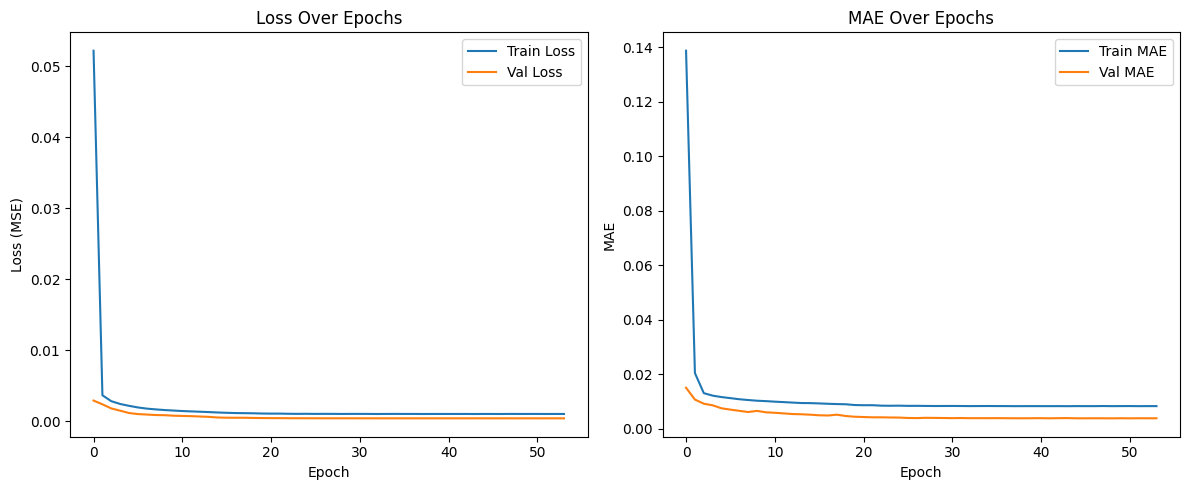

✅ Training plot saved as: ae_training.png

📊 Basic AE Evaluation
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
{'threshold': np.float64(0.004537073502198946), 'precision': np.float64(0.6050420168067226), 'recall': np.float64(0.9965397923875432), 'f1': np.float64(0.7529411764235759), 'roc_auc': np.float64(0.9907510503955055), 'confusion_matrix': {'TP': np.int64(288), 'FP': np.int64(188), 'TN': np.int64(12339), 'FN': np.int64(1)}}
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


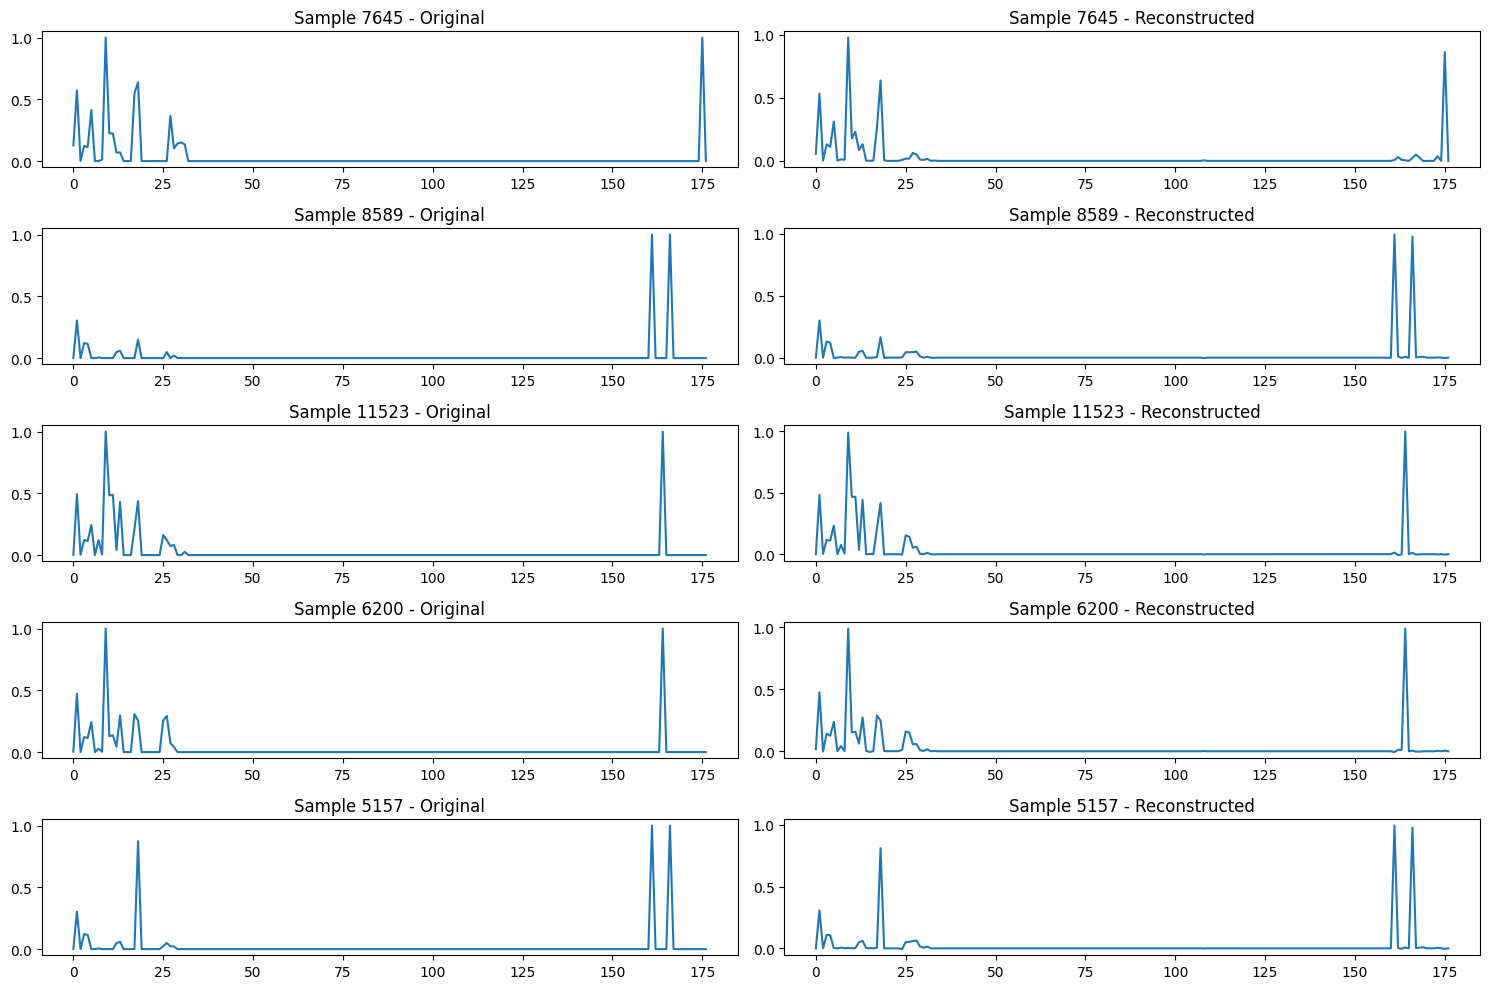

In [8]:
#Train and Evaluate basic AE model
ae = build_ae(input_dim=X_train.shape[1], encoding_dim=16, activation='tanh')
history, model = train_autoencoder(
    ae,
    X_train,
    X_val,
    save_path='best_ae.h5'
)
plot_training_history(history, save_path='ae_training.png')
print("\n📊 Basic AE Evaluation")
re = compute_reconstruction_error(model, X_test)
print(evaluate_anomaly_detection(re, y_test))
visualize_reconstruction(model, X_test.to_numpy())

Epoch 1/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1370 - mae: 0.2465

627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.1362 - mae: 0.2454 - val_loss: 0.0032 - val_mae: 0.0154 - learning_rate: 0.0010
Epoch 2/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 - mae: 0.0271

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0046 - mae: 0.0270 - val_loss: 0.0025 - val_mae: 0.0106 - learning_rate: 0.0010
Epoch 3/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mae: 0.0136

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0033 - mae: 0.0136 - val_loss: 0.0021 - val_mae: 0.0095 - learning_rate: 0.0010
Epoch 4/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 - mae: 0.0127

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0029 - mae: 0.0127 - val_loss: 0.0015 - val_mae: 0.0082 - learning_rate: 0.0010
Epoch 5/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mae: 0.0120

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0024 - mae: 0.0120 - val_loss: 0.0013 - val_mae: 0.0075 - learning_rate: 0.0010
Epoch 6/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022 - mae: 0.0116

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0022 - mae: 0.0116 - val_loss: 0.0011 - val_mae: 0.0072 - learning_rate: 0.0010
Epoch 7/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - mae: 0.0113

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0020 - mae: 0.0112 - val_loss: 0.0010 - val_mae: 0.0069 - learning_rate: 0.0010
Epoch 8/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019 - mae: 0.0108

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0019 - mae: 0.0108 - val_loss: 9.1964e-04 - val_mae: 0.0066 - learning_rate: 0.0010
Epoch 9/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - mae: 0.0108

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0018 - mae: 0.0108 - val_loss: 8.0529e-04 - val_mae: 0.0064 - learning_rate: 0.0010
Epoch 10/100
616/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016 - mae: 0.0105

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0016 - mae: 0.0105 - val_loss: 7.2315e-04 - val_mae: 0.0060 - learning_rate: 0.0010
Epoch 11/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - mae: 0.0102

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0015 - mae: 0.0102 - val_loss: 6.5859e-04 - val_mae: 0.0059 - learning_rate: 0.0010
Epoch 12/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - mae: 0.0100

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0014 - mae: 0.0100 - val_loss: 6.2342e-04 - val_mae: 0.0055 - learning_rate: 0.0010
Epoch 13/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - mae: 0.0097

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0014 - mae: 0.0097 - val_loss: 5.9510e-04 - val_mae: 0.0056 - learning_rate: 0.0010
Epoch 14/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - mae: 0.0097


Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0014 - mae: 0.0097 - val_loss: 5.6485e-04 - val_mae: 0.0051 - learning_rate: 0.0010
Epoch 15/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - mae: 0.0094

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0013 - mae: 0.0094 - val_loss: 5.3225e-04 - val_mae: 0.0047 - learning_rate: 5.0000e-04
Epoch 16/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - mae: 0.0093

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0013 - mae: 0.0093 - val_loss: 5.2535e-04 - val_mae: 0.0050 - learning_rate: 5.0000e-04
Epoch 17/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - mae: 0.0092

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0013 - mae: 0.0092 - val_loss: 5.2256e-04 - val_mae: 0.0049 - learning_rate: 5.0000e-04
Epoch 18/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - mae: 0.0092


Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0013 - mae: 0.0092 - val_loss: 5.0807e-04 - val_mae: 0.0049 - learning_rate: 5.0000e-04
Epoch 19/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0090

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.8232e-04 - val_mae: 0.0044 - learning_rate: 2.5000e-04
Epoch 20/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.8831e-04 - val_mae: 0.0044 - learning_rate: 2.5000e-04
Epoch 21/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0090


Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.8136e-04 - val_mae: 0.0045 - learning_rate: 2.5000e-04
Epoch 22/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.7264e-04 - val_mae: 0.0041 - learning_rate: 1.2500e-04
Epoch 23/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.7569e-04 - val_mae: 0.0044 - learning_rate: 1.2500e-04
Epoch 24/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0089


Epoch 24: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.7135e-04 - val_mae: 0.0042 - learning_rate: 1.2500e-04
Epoch 25/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.6724e-04 - val_mae: 0.0042 - learning_rate: 6.2500e-05
Epoch 26/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.6685e-04 - val_mae: 0.0042 - learning_rate: 6.2500e-05
Epoch 27/100
617/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0089


Epoch 27: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.6550e-04 - val_mae: 0.0042 - learning_rate: 6.2500e-05
Epoch 28/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0088

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0012 - mae: 0.0088 - val_loss: 4.6270e-04 - val_mae: 0.0042 - learning_rate: 3.1250e-05
Epoch 29/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0012 - mae: 0.0088 - val_loss: 4.6426e-04 - val_mae: 0.0042 - learning_rate: 3.1250e-05
Epoch 30/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0088


Epoch 30: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0012 - mae: 0.0088 - val_loss: 4.6261e-04 - val_mae: 0.0042 - learning_rate: 3.1250e-05
Epoch 31/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0012 - mae: 0.0088 - val_loss: 4.6336e-04 - val_mae: 0.0042 - learning_rate: 1.5625e-05
Epoch 32/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0088

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0012 - mae: 0.0088 - val_loss: 4.5998e-04 - val_mae: 0.0041 - learning_rate: 1.5625e-05
Epoch 33/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0089
Epoch 33: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.6151e-04 - val_mae: 0.0042 - learning_rate: 1.5625e-05
Epoch 34/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0012 - mae: 0.0088 - val_loss: 4.6168e-04 - val_mae: 0.0042 - learning_rate: 7.8125e-06
Epoch 35/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.6264e-04 - val_mae: 0.0042 - learning_rate: 7.8125e-06
Epoch 36/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0088
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0012 - mae: 0.0088 - val_loss: 4.6126e-04 - val

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0012 - mae: 0.0088 - val_loss: 4.5888e-04 - val_mae: 0.0041 - learning_rate: 3.9063e-06
Epoch 38/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0012 - mae: 0.0088 - val_loss: 4.5944e-04 - val_mae: 0.0041 - learning_rate: 3.9063e-06
Epoch 39/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0088
Epoch 39: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0012 - mae: 0.0088 - val_loss: 4.6234e-04 - val_mae: 0.0042 - learning_rate: 3.9063e-06
Epoch 40/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0012 - mae: 0.0088 - val_loss: 4.6054e-04 - val_mae: 0.0041 - learning_rate: 1.9531e-06
Epoch 41/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.5937e-04 - val_mae: 0.0041 - learning_rate: 1.9531e-06
Epoch 42/100
617/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0088
Epoch 42: ReduceLROnPl

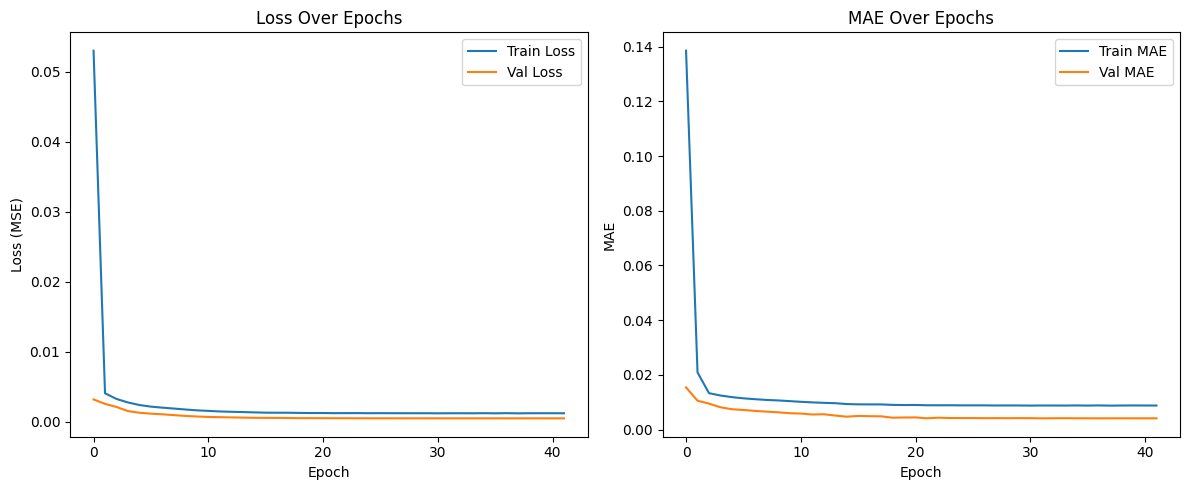

✅ Training plot saved as: ae_mixed_training.png

📊 Mixed Loss AE Evaluation
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
{'threshold': np.float64(0.004391202254479172), 'precision': np.float64(0.6012526096033403), 'recall': np.float64(0.9965397923875432), 'f1': np.float64(0.7499999999530602), 'roc_auc': np.float64(0.9903411399543076), 'confusion_matrix': {'TP': np.int64(288), 'FP': np.int64(191), 'TN': np.int64(12336), 'FN': np.int64(1)}}
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


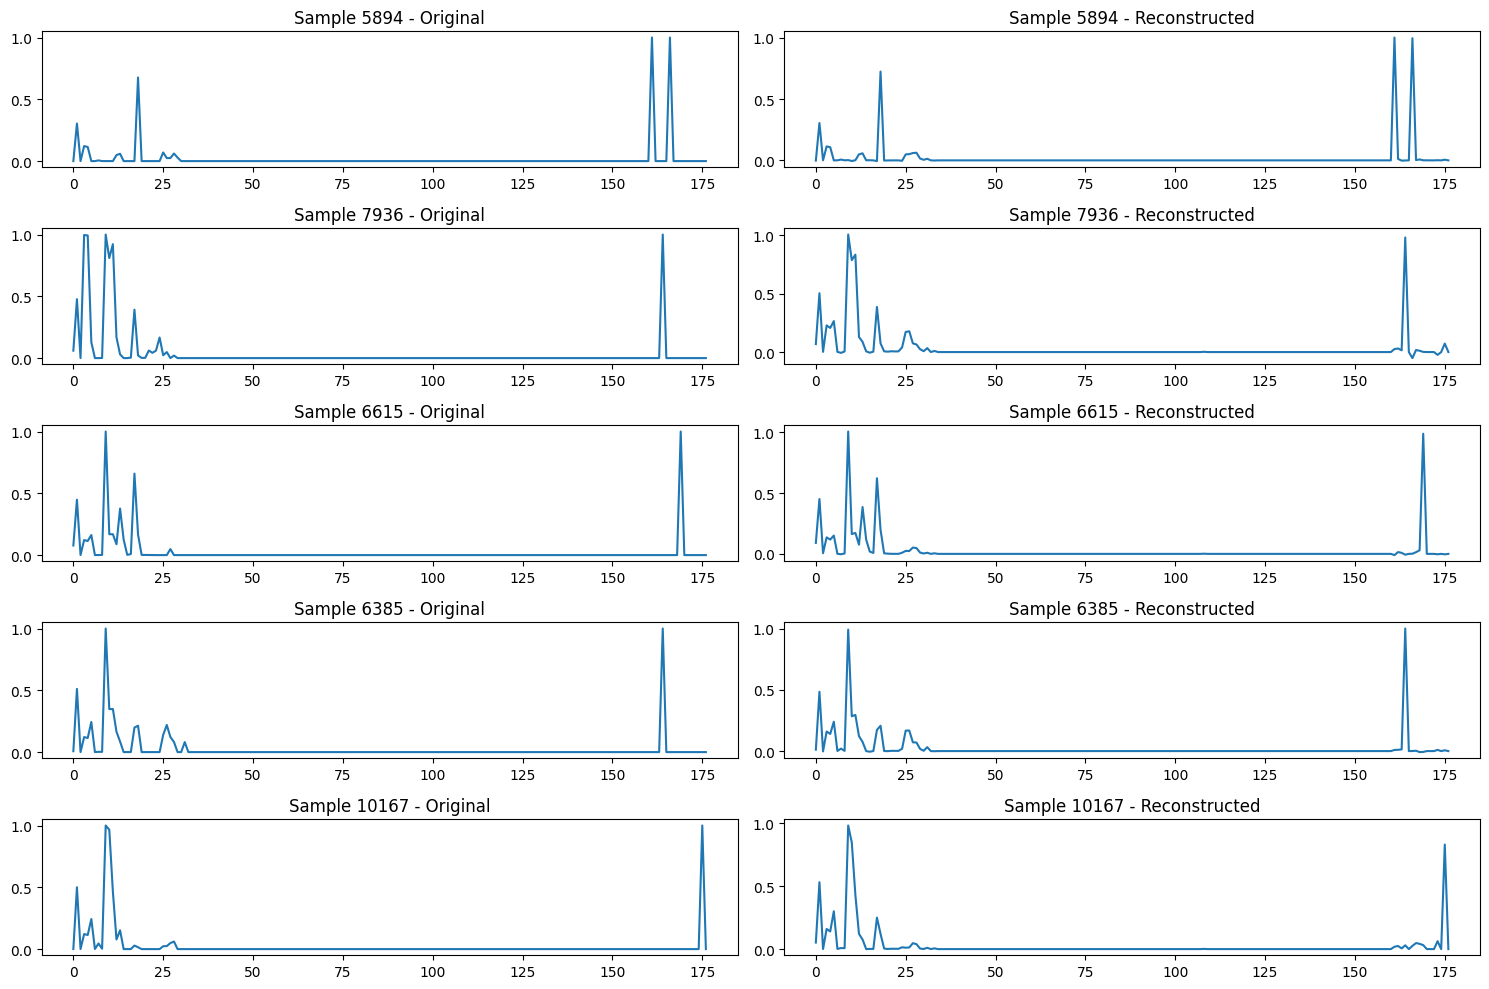

In [9]:
#Train and Evaluate Mixed loss AE
ae_mixed = build_ae(input_dim=X_train.shape[1], encoding_dim=16, activation='tanh')
history_mixed, model_mixed = train_autoencoder_mixed_loss(
    ae_mixed,
    X_train,
    X_val,
    alpha=0.3,  # 可调
    save_path='best_ae_mixed.h5'
)
plot_training_history(history_mixed, save_path='ae_mixed_training.png')
print("\n📊 Mixed Loss AE Evaluation")
re_mixed = compute_reconstruction_error(model_mixed, X_test)
print(evaluate_anomaly_detection(re_mixed, y_test))
visualize_reconstruction(model_mixed, X_test.to_numpy())